In [1]:
#Goal: You need to create a model that can predict whether the given SMS is a Spam or HAM sms


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("SMSSpamCollection", sep='\t', names=['label','sms'])

In [4]:
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.label.value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
#For wordcloud following is suggested to get good understanding of the data:
# a. Always normalize the data (ensure each word follows same case - e.g. lowercase)
# b. Remove stopwords

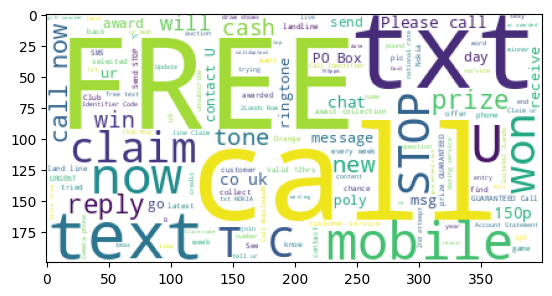

In [15]:
#Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Seperate Spam Messages and Ham MEssages

spamMsg = data[data['label'] == 'spam']['sms']
hamMsg = data[data['label'] == 'ham']['sms']

spam_textData = "".join(spamMsg)

spamWordCloud = WordCloud(background_color='white').generate(spam_textData)

plt.imshow(spamWordCloud)



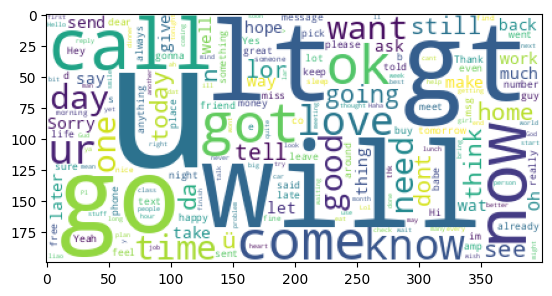

In [16]:
spamMsg = data[data['label'] == 'spam']['sms']
hamMsg = data[data['label'] == 'ham']['sms']

ham_textData = "".join(hamMsg)

hamWordCloud = WordCloud(background_color='white').generate(ham_textData)

plt.imshow(hamWordCloud)



In [7]:
#If there exists any missing values in feature column(purestring), simply DELETE that record.
#If dataset is unbalanced, you cannot use SMOTE to deal with balancing. The only option is to physically reduce bias label.

In [8]:
#Seperate data as features and label

features = data.iloc[:,[1]].values
label = data.iloc[:,[0]].values

In [48]:
features[:5]

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ['U dun say so early hor... U c already then say...'],
       ["Nah I don't think he goes to usf, he lives around here though"]],
      dtype=object)

In [ ]:
#Perform text preprocessing
# You can be creative.
# Text Preprocessing Steps:
# 1. Remove Punctuations
# 2. Extract words out of the sentence
# 3. Normalize words in lowercase
# 4. Remove stopwords
# 5. Apply Advanced normalization (Stemming and Lemma)

In [23]:
sample = "Welcome to Simplilearn! You are learning NLP."
import string

processedText = ''.join([ char for char in sample if char not in string.punctuation ])
print(processedText)
[word.lower() for word in processedText.split()]

Welcome to Simplilearn You are learning NLP


['welcome', 'to', 'simplilearn', 'you', 'are', 'learning', 'nlp']

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
#Function to create text preprocessing

import string
from nltk.corpus import stopwords

def textPreprocessing(document):
  #Remove Punctuations
  processedText = ''.join([ char for char in document if char not in string.punctuation ])

  #Seperate words from sentences and normalize it in lowercase
  processedWords = [word.lower() for word in processedText.split()]

  #Generate Vocab by removing stopwords
  filteredWords = [ word for word in processedWords if word not in stopwords.words('english') ]

  #return vocab
  return filteredWords

In [25]:
textPreprocessing(sample)

['welcome', 'simplilearn', 'learning', 'nlp']

In [26]:
#Bag of Words using Sklearn
# CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocessing)

#Build the vocab

finalWordVectorVocab = wordVector.fit(features)


In [27]:
finalWordVectorVocab.vocabulary_

{'go': 5383,
 'jurong': 6660,
 'point,': 9170,
 'crazy..': 3569,
 'available': 2053,
 'bugis': 2687,
 'n': 8074,
 'great': 5518,
 'world': 12965,
 'la': 6865,
 'e': 4290,
 'buffet...': 2685,
 'cine': 3172,
 'got': 5475,
 'amore': 1735,
 'wat...': 12602,
 'ok': 8527,
 'lar...': 6921,
 'joking': 6617,
 'wif': 12810,
 'u': 12137,
 'oni...': 8600,
 'free': 5075,
 'entry': 4492,
 '2': 748,
 'wkly': 12893,
 'comp': 3349,
 'win': 12830,
 'fa': 4685,
 'cup': 3639,
 'final': 4861,
 'tkts': 11801,
 '21st': 785,
 'may': 7557,
 '2005.': 774,
 'text': 11532,
 '87121': 1256,
 'receive': 9695,
 'question(std': 9532,
 'txt': 12113,
 "rate)t&c's": 9606,
 'apply': 1854,
 "08452810075over18's": 369,
 'dun': 4272,
 'say': 10184,
 'early': 4308,
 'hor...': 6013,
 'c': 2759,
 'already': 1689,
 'say...': 10188,
 'nah': 8086,
 'think': 11667,
 'goes': 5410,
 'usf,': 12338,
 'lives': 7176,
 'around': 1924,
 'though': 11704,
 'freemsg': 5094,
 'hey': 5854,
 'darling': 3733,
 '3': 879,
 "week's": 12672,
 'word':

In [29]:
len(finalWordVectorVocab.vocabulary_)

13415

In [28]:
#To create BOW

bagOfWords = finalWordVectorVocab.transform(features)
bagOfWords

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 52354 stored elements and shape (5572, 13415)>

In [30]:
#Apply TF IDF on bow

from sklearn.feature_extraction.text import TfidfTransformer
tfIdfObject = TfidfTransformer().fit(bagOfWords)

In [32]:
processedFeatureCol = tfIdfObject.transform(bagOfWords)

In [44]:
processedFeatureCol

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52354 stored elements and shape (5572, 13415)>

In [43]:
processedFeatureCol.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
#Create Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(processedFeatureCol,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=6)

In [40]:
#Build LogisticRegressionModel

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
#Check the quality of the model

print("Training Score is : ",model.score(X_train,y_train))
print("Testing Score is : ",model.score(X_test,y_test))

Training Score is :  0.9575947947049585
Testing Score is :  0.9596412556053812


In [42]:
#Classification report

from sklearn.metrics import classification_report
print(classification_report(label, model.predict(processedFeatureCol)))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      4825
        spam       1.00      0.69      0.81       747

    accuracy                           0.96      5572
   macro avg       0.98      0.84      0.90      5572
weighted avg       0.96      0.96      0.95      5572



In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      3845
        spam       1.00      0.69      0.82       612

    accuracy                           0.96      4457
   macro avg       0.98      0.85      0.90      4457
weighted avg       0.96      0.96      0.95      4457



In [50]:
sampleData = np.array([["welcome to my world"],["nlp is interesting"],["nlu is awesome"],["welcome welcome"]])

In [51]:
sampleData

array([['welcome to my world'],
       ['nlp is interesting'],
       ['nlu is awesome'],
       ['welcome welcome']], dtype='<U19')

In [52]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
wordVectorSample = CountVectorizer(analyzer=textPreprocessing)

#Build the vocab

finalWordVectorVocabSample = wordVector.fit(sampleData)

In [53]:
bagOfWordsSample = finalWordVectorVocabSample.transform(sampleData)
bagOfWordsSample

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (4, 6)>

In [54]:
bagOfWordsSample.toarray()

array([[0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 2, 0]])

In [55]:
finalWordVectorVocabSample.vocabulary_

{'welcome': 4, 'world': 5, 'nlp': 2, 'interesting': 1, 'nlu': 3, 'awesome': 0}

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
tfIdfObject = TfidfTransformer().fit(bagOfWordsSample)

In [57]:
processedFeatureColSample = tfIdfObject.transform(bagOfWordsSample)
processedFeatureColSample.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.6191303 ,
        0.78528828],
       [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.        , 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])